<a href="https://colab.research.google.com/github/1o-o1/IoT-botNet-Detection/blob/main/botnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shutil import copyfile
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Upload dataset

In [113]:
benign =pd.read_csv('/kaggle/input/nbaiot-dataset/1.benign.csv')
mirai_ack =pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.ack.csv')
mirai_scan = pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.scan.csv')
mirai_syn = pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.syn.csv')
mirai_udp = pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udp.csv')
mirai_udp_plain = pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udpplain.csv')
gafgyt_combo = pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.combo.csv')
gafgyt_junk = pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.junk.csv')
gafgyt_scan = pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.scan.csv')
gafgyt_tcp = pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.tcp.csv')
gafgyt_udp = pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.udp.csv')


#    unseen dataset

In [114]:
benign2 =pd.read_csv('/kaggle/input/nbaiot-dataset/2.benign.csv')
mirai_scan2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.scan.csv')
mirai_ack2 =pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.ack.csv')
mirai_scan2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.scan.csv')
mirai_syn2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.syn.csv')
mirai_udp2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.udp.csv')
mirai_udp_plain2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.mirai.udpplain.csv')
gafgyt_combo2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.gafgyt.combo.csv')
gafgyt_junk2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.gafgyt.junk.csv')
gafgyt_scan2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.gafgyt.scan.csv')
gafgyt_tcp2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.gafgyt.tcp.csv')
gafgyt_udp2 = pd.read_csv('/kaggle/input/nbaiot-dataset/2.gafgyt.udp.csv')


In [115]:
benign = benign.sample(frac=0.50, replace=False)
mirai_ack = mirai_ack.sample(frac=0.24, replace=False)
mirai_scan = mirai_scan.sample(frac=0.22, replace=False)
mirai_syn = mirai_syn.sample(frac=0.2, replace=False)
mirai_udp = mirai_udp.sample(frac=0.1, replace=False)
mirai_udp_plain = mirai_udp_plain.sample(frac=0.3, replace=False)
gafgyt_combo = gafgyt_combo.sample(frac=0.4, replace=False)
gafgyt_junk = gafgyt_junk.sample(frac=0.8, replace=False)
gafgyt_scan = gafgyt_scan.sample(frac=0.8, replace=False)
gafgyt_tcp = gafgyt_tcp.sample(frac=0.25, replace=False)
gafgyt_udp = gafgyt_udp.sample(frac=0.23, replace=False)

benign['type']='benign'
mirai_ack['type']='mirai_ack'
mirai_scan['type']='mirai_scan'
mirai_syn['type'] = 'mirai_syn'
mirai_udp['type'] = 'mirai_udp'
mirai_udp_plain['type'] = 'mirai_udp_plain'

gafgyt_combo['type'] = 'gafgyt_combo'
gafgyt_junk['type'] = 'gafgyt_junk'
gafgyt_scan['type'] = 'gafgyt_scan'
gafgyt_tcp['type'] = 'gafgyt_tcp'
gafgyt_udp['type'] = 'gafgyt_udp'

data = pd.concat([benign, 
                  mirai_ack, mirai_scan, mirai_syn, mirai_udp, mirai_udp_plain,
                 gafgyt_combo, gafgyt_junk, gafgyt_scan, gafgyt_tcp, gafgyt_udp], 
                 axis=0, sort=False, ignore_index=True)


In [116]:
benign2 = benign2.sample(frac=0.50, replace=False)
mirai_ack2 = mirai_ack2.sample(frac=0.24, replace=False)
mirai_scan2 = mirai_scan2.sample(frac=0.22, replace=False)

mirai_syn2 = mirai_syn2.sample(frac=0.2, replace=False)
mirai_udp2 = mirai_udp2.sample(frac=0.1, replace=False)
mirai_udp_plain2 = mirai_udp_plain2.sample(frac=0.3, replace=False)

gafgyt_combo2 = gafgyt_combo2.sample(frac=0.4, replace=False)
gafgyt_junk2 = gafgyt_junk2.sample(frac=0.8, replace=False)
gafgyt_scan2 = gafgyt_scan2.sample(frac=0.8, replace=False)
gafgyt_tcp2 = gafgyt_tcp2.sample(frac=0.25, replace=False)
gafgyt_udp2 = gafgyt_udp2.sample(frac=0.23, replace=False)

benign2['type']='benign'
mirai_ack2['type']='mirai_ack'
mirai_scan2['type']='mirai_scan'

mirai_syn2['type'] = 'mirai_syn'
mirai_udp2['type'] = 'mirai_udp'
mirai_udp_plain2['type'] = 'mirai_udp_plain'

gafgyt_combo2['type'] = 'gafgyt_combo'
gafgyt_junk2['type'] = 'gafgyt_junk'
gafgyt_scan2['type'] = 'gafgyt_scan'
gafgyt_tcp2['type'] = 'gafgyt_tcp'
gafgyt_udp2['type'] = 'gafgyt_udp'

unseen_data = pd.concat([benign2, 
                  mirai_ack2, mirai_scan2, mirai_syn2, mirai_udp2, mirai_udp_plain2,
                 gafgyt_combo2, gafgyt_junk2, gafgyt_scan2, gafgyt_tcp2, gafgyt_udp2], 
                 axis=0, sort=False, ignore_index=True)


In [117]:
#unseen_data = pd.concat([benign2, scan],axis=0, sort=False, ignore_index=True)

In [118]:
data=data.iloc[:, :28].join(data['type'])
unseen_data=unseen_data.iloc[:, :28].join(unseen_data['type'])

In [119]:
data.groupby('type')['type'].count()

type
benign             24774
gafgyt_combo       23887
gafgyt_junk        23254
gafgyt_scan        23879
gafgyt_tcp         23035
gafgyt_udp         24351
mirai_ack          24527
mirai_scan         23691
mirai_syn          24515
mirai_udp          23766
mirai_udp_plain    24595
Name: type, dtype: int64

In [120]:
unseen_data.groupby('type')['type'].count()

type
benign              6556
gafgyt_combo       21205
gafgyt_junk        24250
gafgyt_scan        21995
gafgyt_tcp         23755
gafgyt_udp         24102
mirai_ack          27188
mirai_scan          9502
mirai_syn          23361
mirai_udp          15148
mirai_udp_plain    26210
Name: type, dtype: int64

In [121]:
benign.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,24774.000000,24774.000000,2.477400e+04,24774.000000,24774.000000,2.477400e+04,24774.000000,24774.000000,24774.000000,24774.000000,...,2.477400e+04,2.477400e+04,24774.000000,24774.000000,24774.000000,2.477400e+04,24774.000000,2.477400e+04,2.477400e+04,2.477400e+04
mean,2.258100,92.439947,2.145024e+01,2.290025,92.433614,2.702286e+01,2.424162,92.852601,68.936619,4.292182,...,9.975362e+00,2.045557e+00,0.000415,4.853167,92.397224,1.509351e-01,130.231035,1.068508e+01,2.482323e+00,1.942355e-03
std,1.452625,17.616749,3.758245e+02,1.468059,17.424893,3.926386e+02,1.502132,15.856251,448.849464,1.642708,...,3.075984e+02,8.094910e+01,0.014565,1.248929,18.019014,1.960739e+00,25.040253,3.069752e+02,8.717025e+01,2.754643e-02
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-7.291934e+02,-0.142042,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.899823e+02,-1.353522e-01
25%,1.000000,98.000000,0.000000e+00,1.000030,97.986566,1.820000e-12,1.031111,93.510662,0.000895,2.879888,...,4.550000e-13,-1.750000e-35,0.000000,4.219087,98.000000,6.740000e-07,138.592929,1.820000e-12,-4.600000e-29,-7.250000e-18
50%,1.956138,101.999737,7.155000e-08,1.985297,101.985493,3.745050e-04,1.999987,101.338004,1.186232,4.239669,...,1.820000e-12,7.535000e-84,0.000000,4.220164,102.000000,1.350000e-06,144.249783,3.640000e-12,1.400000e-30,0.000000e+00
75%,3.110193,102.000000,2.599057e-04,3.388444,102.000000,1.711012e-01,3.968813,101.999556,42.271017,5.607487,...,3.640000e-12,3.960000e-34,0.000000,5.308296,102.000000,1.910000e-06,144.249783,5.140000e-12,7.470000e-29,2.010000e-17
max,8.837730,360.458980,2.101452e+04,10.876876,360.275733,2.138792e+04,14.488665,360.091968,20362.325690,20.148226,...,1.088123e+04,4.381892e+03,0.767997,11.274613,354.000000,5.890428e+01,354.000000,1.088186e+04,4.393551e+03,7.754023e-01


In [122]:
benign2.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,...,6.556000e+03,6.556000e+03,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6.556000e+03,6556.000000,6556.000000
mean,1.145111,208.577726,6367.127365,1.238619,216.480991,8235.321429,1.496337,230.801103,11117.795587,2.559417,...,1.981472e+04,-2.177352e+03,-0.095005,7.489807,197.352953,115.486690,294.141505,3.145959e+04,-2955.848182,-0.093002
std,0.244073,146.381485,13339.696863,0.347573,139.987167,15600.837039,0.632848,128.391031,16457.933193,1.342323,...,2.796989e+04,4.702826e+03,0.175386,3.641778,88.117807,79.770583,142.602033,3.002220e+04,5043.617291,0.140247
min,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-3.566602e+04,-1.010724,1.000000,60.000000,0.000000,60.000000,0.000000e+00,-39463.345860,-0.640121
25%,1.000000,67.360250,0.000000,1.000000,77.411302,0.000000,1.000000,110.000000,0.001279,1.499897,...,1.020000e-12,-1.427235e+03,-0.141734,3.114234,98.885334,0.000001,99.418350,1.820000e-12,-4976.137440,-0.183323
50%,1.000001,144.097851,0.002834,1.000378,174.715813,3.392605,1.130531,207.953808,2256.245609,2.423715,...,2.102151e+04,-1.782537e-01,-0.000407,8.656583,240.719718,153.335619,367.892117,3.444343e+04,-737.027454,-0.028184
75%,1.257844,380.000000,12295.661220,1.460004,379.999999,18522.333820,1.807281,379.771912,21627.457022,3.227611,...,2.719399e+04,2.667500e-52,0.000000,10.117503,257.148806,165.006543,390.458219,4.198094e+04,0.000000,0.000000
max,3.952020,1108.154953,187602.375200,4.557153,1090.333261,201610.552900,7.300223,940.451256,223258.803600,16.276783,...,3.906840e+05,3.384711e+04,0.802192,22.158603,590.000000,319.507716,681.956010,3.641805e+05,26797.441690,0.387897


In [123]:
#Shuffling rows of the dataframe
sampler = np.random.permutation(len(data))
data = data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,type
95642,106.011880,72.343413,21.183400,191.211900,71.204133,32.701594,630.821627,69.93502,41.794238,6628.447990,...,71.204133,32.701594,630.821627,69.93502,41.794238,6628.447990,69.438783,43.336097,36668.718270,mirai_syn
223536,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,...,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,gafgyt_tcp
252015,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,...,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,gafgyt_udp
250683,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,...,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,gafgyt_udp
51157,18.108395,60.135324,2.011546,35.788032,60.141340,2.100120,172.140818,60.06254,0.934194,2216.931136,...,60.141340,2.100120,172.140818,60.06254,0.934194,2216.931136,60.019972,0.507186,19988.422614,mirai_scan


In [124]:
#Shuffling rows of the dataframe
sampler2 = np.random.permutation(len(unseen_data))
unseen_data = data.take(sampler2)
unseen_data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,type
101276,159.478796,228.329869,54820.010553,243.443882,274.714256,59966.630726,663.954019,342.232950,59767.633789,6402.926546,...,274.714256,59966.630726,663.954019,342.232950,59767.633789,6402.926546,378.988925,55824.123051,59856.833840,mirai_udp
250582,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,gafgyt_udp
145887,170.344341,74.007278,0.174611,282.335669,74.015935,0.382182,823.528629,74.031238,0.762206,7633.800741,...,74.015935,0.382182,823.528629,74.031238,0.762206,7633.800741,74.343487,237.903324,22315.583704,gafgyt_combo
80883,104.984434,72.366091,20.205094,190.273854,71.245994,30.972029,633.909912,69.980090,40.123432,6633.497846,...,71.245994,30.972029,633.909912,69.980090,40.123432,6633.497846,69.446006,43.114202,51308.665006,mirai_syn
59263,52.220814,60.000000,0.000001,70.654117,60.000022,0.001037,207.707430,60.007993,0.355622,2252.351811,...,60.000022,0.001037,207.707430,60.007993,0.355622,2252.351811,60.027064,0.993251,19134.418913,mirai_scan


In [125]:
features = data.drop(['type'], axis=1)
target = data.filter(['type'])

In [126]:
features2 = unseen_data.drop(['type'], axis=1)
target2 = unseen_data.filter(['type'])

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_st = scaler.fit_transform(features)

In [128]:
unseen_data_st = scaler.fit_transform(features2)

In [129]:
# Encode target column data
target.type = target.type.replace('benign', 0).replace('mirai_ack', 1).replace('mirai_scan', 2).replace('mirai_syn', 3).replace('mirai_udp', 4).replace('mirai_udp_plain', 5).replace('gafgyt_combo', 6).replace('gafgyt_junk', 7).replace('gafgyt_scan', 8).replace('gafgyt_tcp', 9).replace('gafgyt_udp', 10)

/tmp/ipykernel_34/258796430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target.type = target.type.replace('benign', 0).replace('mirai_ack', 1).replace('mirai_scan', 2).replace('mirai_syn', 3).replace('mirai_udp', 4).replace('mirai_udp_plain', 5).replace('gafgyt_combo', 6).replace('gafgyt_junk', 7).replace('gafgyt_scan', 8).replace('gafgyt_tcp', 9).replace('gafgyt_udp', 10)


In [130]:
target2.type = target2.type.replace('benign', 0).replace('mirai_ack', 1).replace('mirai_scan', 2).replace('mirai_syn', 3).replace('mirai_udp', 4).replace('mirai_udp_plain', 5).replace('gafgyt_combo', 6).replace('gafgyt_junk', 7).replace('gafgyt_scan', 8).replace('gafgyt_tcp', 9).replace('gafgyt_udp', 10)

/tmp/ipykernel_34/2222207283.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target2.type = target2.type.replace('benign', 0).replace('mirai_ack', 1).replace('mirai_scan', 2).replace('mirai_syn', 3).replace('mirai_udp', 4).replace('mirai_udp_plain', 5).replace('gafgyt_combo', 6).replace('gafgyt_junk', 7).replace('gafgyt_scan', 8).replace('gafgyt_tcp', 9).replace('gafgyt_udp', 10)


In [131]:
# Create dataset
data_v2 = {'data': data_st, 'target': np.array(target['type'].values)} 

In [132]:
# Create dataset
unseen_data_v2 = {'u_data': unseen_data_st, 'u_target': np.array(target2['type'].values)} 

In [133]:
iot_unseen = unseen_data_v2['u_data']
iot_unseen_tgt = unseen_data_v2['u_target']

In [134]:
from sklearn.model_selection import train_test_split
# Split data into Train/test 25% datasets
(iot_train, iot_test,
 iot_train_tgt, iot_test_tgt) = train_test_split(data_v2['data'], 
                                                 data_v2['target'], 
                                                 test_size=0.25)

In [135]:
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
import sklearn.metrics as metrics
import sklearn.model_selection as skms
import sklearn.preprocessing as skpre
import sklearn.multiclass as skmulti

In [136]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier #
from sklearn.ensemble import AdaBoostClassifier #
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC #
from sklearn.neighbors import KNeighborsClassifier #
from sklearn.tree import DecisionTreeClassifier #

from xgboost import XGBClassifier #

In [137]:
classifiers = { #
         #'XGB': XGBClassifier(random_state=3, learning_rate=0.05, max_depth=10, n_estimators=100), 
         #'AdaBoost Classifier': AdaBoostClassifier(n_estimators=20)
         #'Random Forest':  RandomForestClassifier()
         #'QDA': discriminant_analysis.QuadraticDiscriminantAnalysis(),
         #'LDA': discriminant_analysis.LinearDiscriminantAnalysis(),
         #'GNB': naive_bayes.GaussianNB()
         'SVC(1)': svm.SVC(kernel="linear"),
         #'SVC(2)': svm.LinearSVC(),#
         #'DTC': tree.DecisionTreeClassifier(),
         #'5NN-C': neighbors.KNeighborsClassifier(),
         #'10NN-C': neighbors.KNeighborsClassifier(n_neighbors=10)
}

In [138]:
import joblib
pr_unseen=[]
pr_test=[]
for name, model in classifiers.items():
    model.fit(iot_train, iot_train_tgt)
    # Save the trained model to a file
    #joblib.dump(model, 'botnet_model.pkl')
    preds = model.predict(iot_test)
    pr_test.append(preds)
    unseen_preds = model.predict(iot_unseen)
    pr_unseen.append(unseen_preds)



In [139]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
Name= 'rawDataRes'
res=[]
output=[]
output2=[]
for (i, v),Xpred in zip(classifiers.items(),pr_test):
    row= {}
    Xpred =  v.predict(iot_test)
    scores = cross_val_score(v, iot_train, iot_train_tgt, cv=5)
    accuracy = metrics.accuracy_score(iot_test_tgt, Xpred)
    confusion_matrix = metrics.confusion_matrix(iot_test_tgt, Xpred)
    classification = metrics.classification_report(iot_test_tgt, Xpred)
  
    lines = classification.split('\n')
    line = lines[7:-1][0]
    row_data = line.split('      ')
    row ['Tst Accuracy'] = accuracy
    row ['Tst CV mean'] = scores.mean()
    row ['Tst Precision'] = float(row_data[1])
    row ['Tst Recall'] = float(row_data[2])
    row ['Tst F1-Score'] = float(row_data[3])
    row ['Tst TN'] = confusion_matrix[0][0]
    row ['Tst FP'] = confusion_matrix[0][1]
    row ['Tst FN'] = confusion_matrix[1][0]
    row ['Tst TP'] = confusion_matrix[1][1]
    output2.append('.......................{} test Model Evaluation =============================='.format(i))
    output2.append("Cross Validation Mean Score: ")
    output2.append(scores.mean())
    output2.append("Model Accuracy: ")
    output2.append(accuracy)
    output2.append("Confusion matrix:")
    output2.append(confusion_matrix)
    output2.append("Classification report:")
    output2.append(classification)
    res.append(row)
#pd.DataFrame.from_dict(res).to_csv('TestResult.csv',index=False)

In [140]:
#pd.DataFrame.from_dict(res).to_csv('TestResult2.csv',index=False)

In [141]:
output2

['.......................SVC(1) test Model Evaluation ==============================',
 'Cross Validation Mean Score: ',
 0.8737065159809289,
 'Model Accuracy: ',
 0.8735110263512389,
 'Confusion matrix:',
 array([[6089,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
        [   0, 6238,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 5862,    0,    0,    0,    0,    0,    0,    0,    0],
        [   1,    0,    0, 6086,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0, 6073,    0,    0,    0,    0,    0,    0],
        [   0,    2,    0,    0,    0, 6095,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0, 4548, 1353,    0,    0,    0],
        [   4,    0,    0,    0,    0,    0, 1161, 4576,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0, 5982,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    3, 5831],
        [   4,    0,    0,    0,  

In [142]:
pd.DataFrame(res)

,Tst Accuracy,Tst CV mean,Tst Precision,Tst Recall,Tst F1-Score,Tst TN,Tst FP,Tst FN,Tst TP
0,0.873511,0.873707,5.0,1.0,1.0,6089,0,0,6238


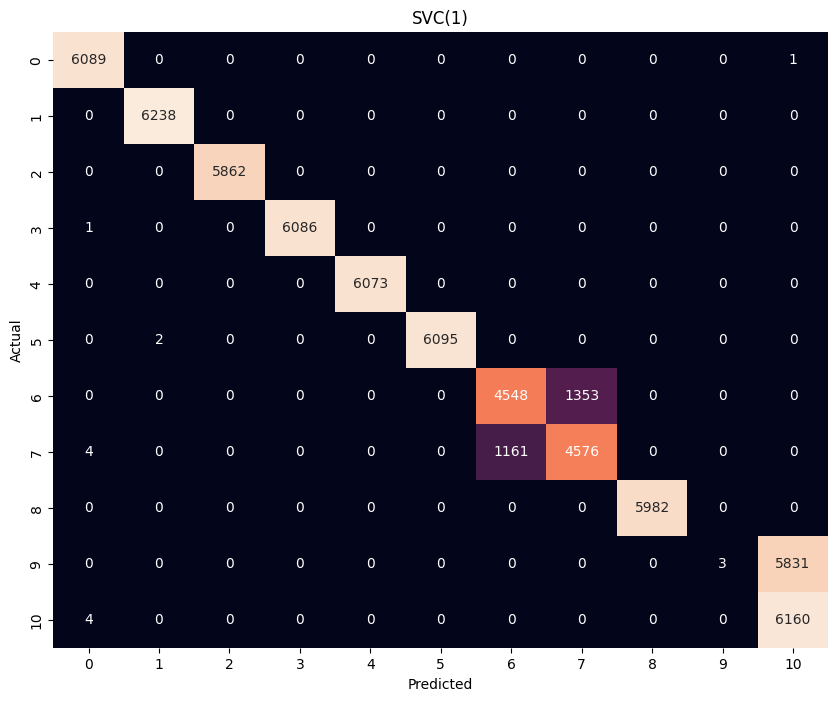

In [143]:
# Choose the model you want to visualize
selected_model = list(classifiers.keys())[0]

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Get the selected model and plot its confusion matrix
selected_preds = (classifiers[selected_model].fit(iot_train, iot_train_tgt)
                  .predict(iot_test))
cm = metrics.confusion_matrix(iot_test_tgt, selected_preds)
sns.heatmap(cm, annot=True, cbar=False, ax=ax, fmt="d")
ax.set_title(selected_model)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

plt.show()

In [144]:
Name= 'rawDataRes2'
res2=[]
output=[]
for (i, v),Xpred_unseen in zip(classifiers.items(),pr_unseen):
    row2= {}
    Xpred_unseen =  v.predict(iot_unseen)
    accuracy_u = metrics.accuracy_score(iot_unseen_tgt, Xpred_unseen)
    confusion_matrix_u = metrics.confusion_matrix(iot_unseen_tgt, Xpred_unseen)
    classification_u = metrics.classification_report(iot_unseen_tgt, Xpred_unseen)
  
    lines2 = classification_u.split('\n')
    line2 = lines2[7:-1][0]
    row_data2 = line2.split('      ')
    row2 ['Unseen Accuracy'] = accuracy_u
    row2 ['Tst Precision'] = float(row_data2[1])
    row2 ['Tst Recall'] = float(row_data2[2])
    row2 ['Tst F1-Score'] = float(row_data2[3])
    row2 ['Tst TN'] = confusion_matrix_u[0][0]
    row2 ['Tst FP'] = confusion_matrix_u[0][1]
    row2 ['Tst FN'] = confusion_matrix_u[1][0]
    row2 ['Tst TP'] = confusion_matrix_u[1][1]
    output.append('.......................{} Unseen Model Evaluation =============================='.format(i))
    output.append("Unseen Model Accuracy: ")
    output.append(accuracy_u)
    output.append("Unseen Confusion matrix:")
    output.append(confusion_matrix_u)
    output.append("Unseen Classification report:")
    output.append(classification_u)
    res2.append(row2)
#pd.DataFrame.from_dict(res2).to_csv('TestResult2.csv',index=False)

In [145]:
output

['.......................SVC(1) Unseen Model Evaluation ==============================',
 'Unseen Model Accuracy: ',
 0.8743998351786162,
 'Unseen Confusion matrix:',
 array([[20943,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     2],
        [    0, 20693,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [    1,     0, 19997,     0,     0,     0,     0,     0,     0,
             0,     0],
        [    2,     0,     0, 20756,     0,     0,     0,     0,     0,
             0,     0],
        [    0,     0,     0,     0, 20097,     0,     0,     0,     0,
             0,     0],
        [    0,     3,     0,     0,     0, 20810,     0,     0,     0,
             0,     0],
        [    2,     0,     0,     0,     0,     0, 15476,  4713,     0,
             0,     0],
        [   13,     0,     0,     0,     0,     0,  3841, 15739,     0,
             0,     0],
        [    4,     0,     0,     0,     0,     0,     0,     0, 

In [146]:
pd.DataFrame(res)

,Tst Accuracy,Tst CV mean,Tst Precision,Tst Recall,Tst F1-Score,Tst TN,Tst FP,Tst FN,Tst TP
0,0.873511,0.873707,5.0,1.0,1.0,6089,0,0,6238


In [147]:
def compute_readability(text):Text(0.5, 114.00000000000011, 'Predicted')

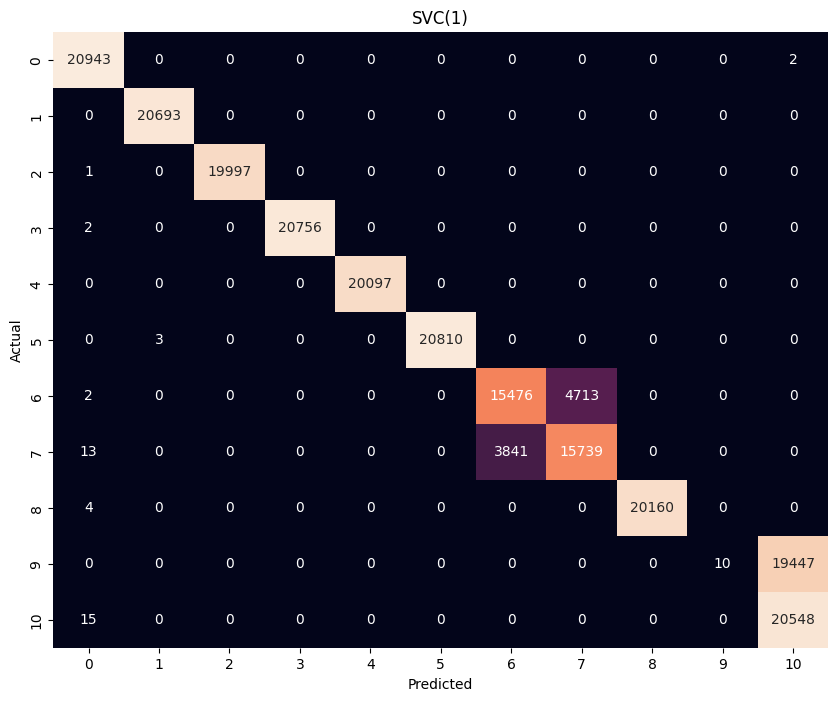

In [148]:
# Choose the model you want to visualize
selected_model = list(classifiers.keys())[0]

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Get the selected model and plot its confusion matrix
selected_preds = (classifiers[selected_model].fit(iot_train, iot_train_tgt)
                  .predict(iot_unseen))
cm = metrics.confusion_matrix(iot_unseen_tgt, selected_preds)
sns.heatmap(cm, annot=True, cbar=False, ax=ax, fmt="d")
ax.set_title(selected_model)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

plt.show()